# TP2: algorithme ; incertitude de mesures

In [1]:
import numpy as np

##  Exercice 1 : algorithmes

1. Calculer la somme des entiers de 1 à N, avec une boucle à compteur, puis avec une boucle ‘tant que’.

In [2]:
N = 20
Somme = 0
Compteur = range(1,N+1)
for i in Compteur:
   Somme += i
print(Somme)
Compteur


210


range(1, 21)

In [3]:
N = 20
Somme = 0
Compteur = 0
while Compteur < N:
   Compteur += 1 
   Somme += Compteur
print(Somme)

210


2. Calculer le factoriel de N

In [4]:
N = 20
Factoriel = 1
Compteur = range(1,20+1)
for i in Compteur:
   Factoriel *= i
print(Factoriel)

np.math.factorial(N)#à condition d'importer le module numpy

2432902008176640000


2432902008176640000

## Exercice 2 : incertitudes de mesures ; propagation dans un calcul


### 2.1 Rappels de cours 4

\* notions d’erreur, d’incertitude ; précision et justesse d’un système de mesure

\* métrique standard (std) et interprétation dans le cadre de la loi de distribution normale (et loi de Student)

\* propagation d’incertitude : formule générale, formules particulières

* erreur = différence valeur exacte - mesurée, jamais accessible sauf si utilisation de standard = référence = étalon
* en pratique : on fait des mesures pour approcher la valeur exacte, avec une incertitude, due au manipulateur, au système de mesure, etc.
* métrique standard de l’incertitude : déviation standard = écart type (notée ‘std’ ou σ) ; interprétation en terme de probabilité si les mesures suivent une loi de distribution normale=gaussienne (ou une loi de Student : voir cette loi)
* précision et justesse d’un système de mesure (cf. schéma de la cible dans le cours). Typiquement la précision est estimée par un test de reproductibilité (‘répétabilité’), en répétant les mesures du même échantillon. La justesse ne peut être estimée qu’en utilisant un standard de composition connue.
* si on multiplie N fois la mesure d’un même échantillon (N=10, 20, 100, ...), qu’améliore-t’on ? Comme la std de ces mesures est caractéristique du système de mesure, cette std ne diminue pas vraiment. Par contre, on améliore la précision sur la valeur moyenne du paramètre mesuré. Cette précision est appelée ‘erreur standard sur la moyenne’, notée σe, et égale à σe = σ/racine(N).
* propagation d’incertitude : formule générale, formules particulières (somme/produit)

### 2.2 Application : mesures des concentrations chimiques des aérosols en Antarctique

Le programme CESOA (Cycle atmosphérique du soufre aux moyennes et hautes latitudes sud) réalise un suivi des concentrations en différentes espèces chimiques, notamment soufrées, contenues dans les aérosols en Antarctique. On s’intéresse ici aux mesures en sulfate (SO<sub>4</sub><sup>2-</sup>) et nitrate (NO<sub>3</sub><sup>-</sup>) réalisées pendant l’année 2016 à la station française de Dumont d’Urville, sur la côte antarctique. (*Un grand merci à Bruno Jourdain pour la communication de ces résultats dont il est responsable*)

L’air est pompé à travers un filtre pendant 24 à 48h afin d’en récupérer les aérosols. Les espèces chimiques sont mises en solution et leur concentration mesurée par chromatographie. La concentration mesurée (Cl, en ng/mL) dans un volume connu de solution (Vl, en mL) permet de calculer la concentration de l’espèce dans l’air (Cair, en ng/m<sup>3</sup>) à partir du volume d’air pompé, Vair (m<sup>3</sup>).

Presque tous les mois, une mesure est réalisée sur un filtre propre afin de tester le protocole et les appareils de mesure (‘blanc’ de mesure). Les résultats des blancs sont indiqués dans le tableau ci-dessous.

| Sample Name         | NO<sup>3-</sup> (ng/mL) | SO<sub>4</sub><sup>2-</sup> (ng/mL) | volume d'échantillon (mL) |
|---------------------|--------------|---------------|----------------------------|
| blanc filtre 160216 | 3.91         | 3.38          | 10                         |
| blanc filtre 160316 | 3.27         | 3.32          | 10                         |
| blanc filtre 150416 | 24.41        | 10.05         | 10                         |
| blanc filtre 160516 | 13.56        | 7.49          | 10                         |
| blanc filtre 130616 | 52.91        | 8.85          | 10                         |
| blanc filtre 150716 | 5.81         | 15.23         | 10                         |
| blanc filtre 170916 | 55.10        | 12.14         | 10                         |
| blanc filtre 161016 | 77.02        | 3.75          | 10                         |
| **blanc moyen 2016**    | 29.50        | 7.74          |                            |
| **écart type 2016**     | 28.40        | 4.68          |                            |

2.2.1 Comment interpréter et utiliser ces résultats des ‘blancs’ de mesures ?

‘Blanc’ de mesure = mesure sur un échantillon propre, ici filtre propre. Les mesures fournissent des concentrations non nulles, et variables : leur origine est d’une part la contamination (présence des éléments dans l’air ambiant -on parle ici de nanogrammes = $10^{-9}$ g !! -), d’autre part la manipulation et l’état du système de mesures. La moyenne des blancs est utilisée comme une estimation de la contamination (le niveau de bruit moyen), et l’écart type des blancs comme l’incertitude sur une mesure (test de reproductibilité).

2.2.2 Lire le fichier de mesures pour l’année 2016. Explorer ces valeurs avec des graphes.

In [5]:
#Attention mesure incorrecte le 9/5/2016 (origine inconnue !) : à supprimer.
#A noter la saisonnalité marquée du sulfate. Egalement pics assez nombreux en sulfate (cf. question 2.5).
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import bytespdate2num,num2date

path_data = 'aerosol_DDU_2016.csv'  # Remplacer ici par votre chemin d'accès au fichier de données.

[date, no3, so4, V_pompe] = np.loadtxt(path_data, skiprows = 1, converters = {0:bytespdate2num('%d/%m/%y')}, unpack = True) # Ici, on charge le jeu de données et assigne à chaque colonne un nom différent.
fig = plt.figure(1, dpi=300)
plt.plot_date(date,so4,'-',color='red',label='SO4')
fig.autofmt_xdate() # commande pour afficher correctement la date sur l'axe des abscisses.
plt.title('Concentration SO4 DDU')
plt.xlabel('Date')
plt.ylabel('Concentration [ng.mL-1]')
plt.legend()
plt.show()
#plt.savefig('C_liq_SO4_DDU_overview.pdf') # Commande pour enregistrer votre graphe en pdf. Changer pour votre chemin.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The bytespdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  if __name__ == '__main__':
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
  if __name__ == '__main__':


<Figure size 1920x1440 with 1 Axes>

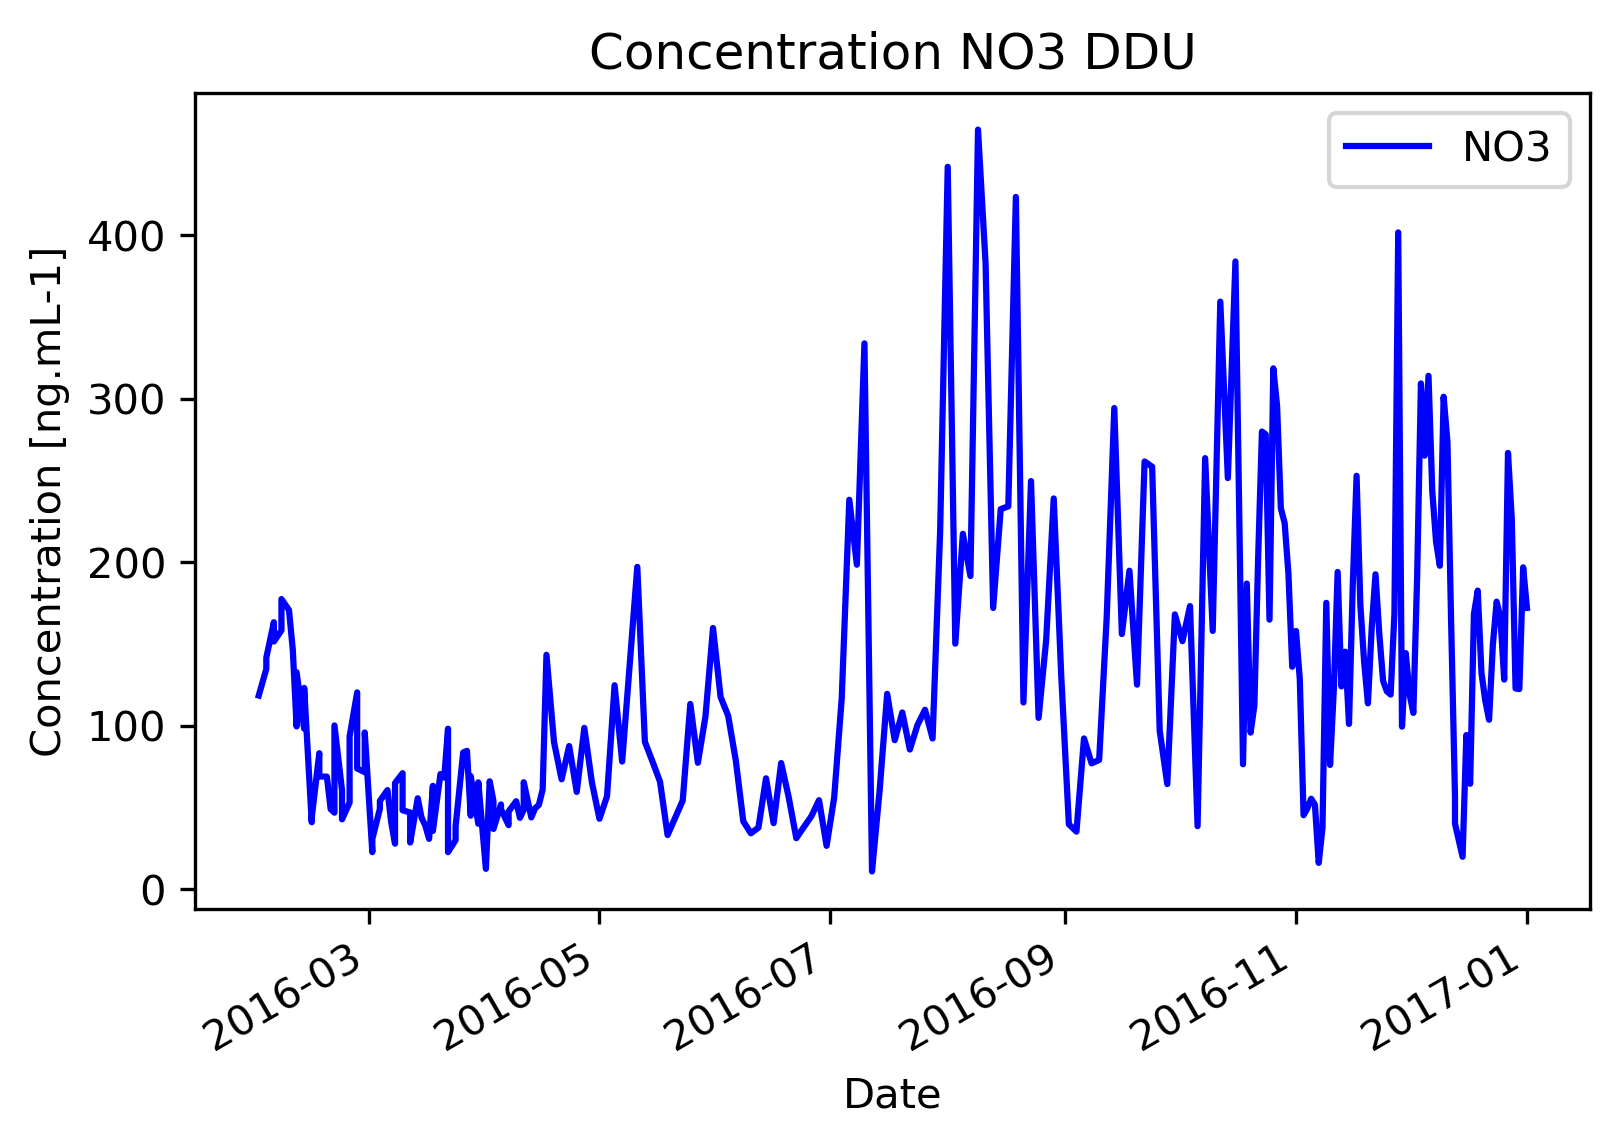

In [6]:
fig = plt.figure(10, dpi=300)
plt.plot_date(date,no3,'-',color='blue',label='NO3')
fig.autofmt_xdate()
plt.title('Concentration NO3 DDU')
plt.xlabel('Date')
plt.ylabel('Concentration [ng.mL-1]')
plt.legend()
#plt.savefig('C_liq_NO3_DDU_overview.pdf') # Idem, changer pour votre chemin

2.2.3 Ecrire le calcul formel de la concentration d’une espèce dans l’air, Cair. En déduire l’incertitude sur Cair.

### $C_{air} = \frac{C_x.V_x}{V_{air}}$  
On applique la formule de l’incertitude relative : 
### $(\frac{\Delta C_{air}}{C_{air}})^2 =(\frac{\Delta C_{x}}{C_{x}})^2 + (\frac{\Delta V_{x}}{V_{x}})^2 + (\frac{\Delta V_{air}}{V_{air}})^2 $


2.2.4 Application : l’incertitude sur le volume d’air pompé est de 0.1 pourmil. Calculer Cair et son incertitude pour le sulfate. Faire un graphe pour le mois de novembre, avec les barres d’incertitude. Quelle source d’incertitude domine ?

### erratum
Je vous ai fais utiliser une incertidude qui était négligeable. Donc petit résumé sur les erreurs négligeables.
Il y a 3 sources d'erreur :  
  
$\frac{\Delta C_{x}}{C_{x}}$ incertitude sur la mesure de la concentration dans l'échantillon. Pour le sulface, cela correspond à l'écart type des blancs : $\frac{4,68 ng/mL}{}$

$\frac{\Delta V_{air}}{V_{air}}$ incertitude sur le volume d'air prélevé. Cette incertitude est ici exprimé comme un pourcentage : 0,01%

$\frac{\Delta V_{x}}{V_{x}}$ incertitude sur le volume de l'échantillon prélevé. Elle est aussi exprimé comme un pourcentage 0,1%  


$\frac{\Delta V_{air}}{V_{air}}$ <<< $\frac{\Delta V_{x}}{V_{x}}$ <<< $\frac{\Delta C_{x}}{C_{x}}$

Il est donc possible de négliger l'incertitude sur la prélèvement de l'air et de l'échantillon il reste donc que l'incertitude lié à la précision de l'appareil.  

Il nous reste alors :  

### $\Delta C_{air} =\sqrt{(\frac{\Delta C_{x}}{C_{x}})^2 *C_{air}^2}$


Cette petite erreur ne change pas nos valeurs mais simplifie juste le calcul.

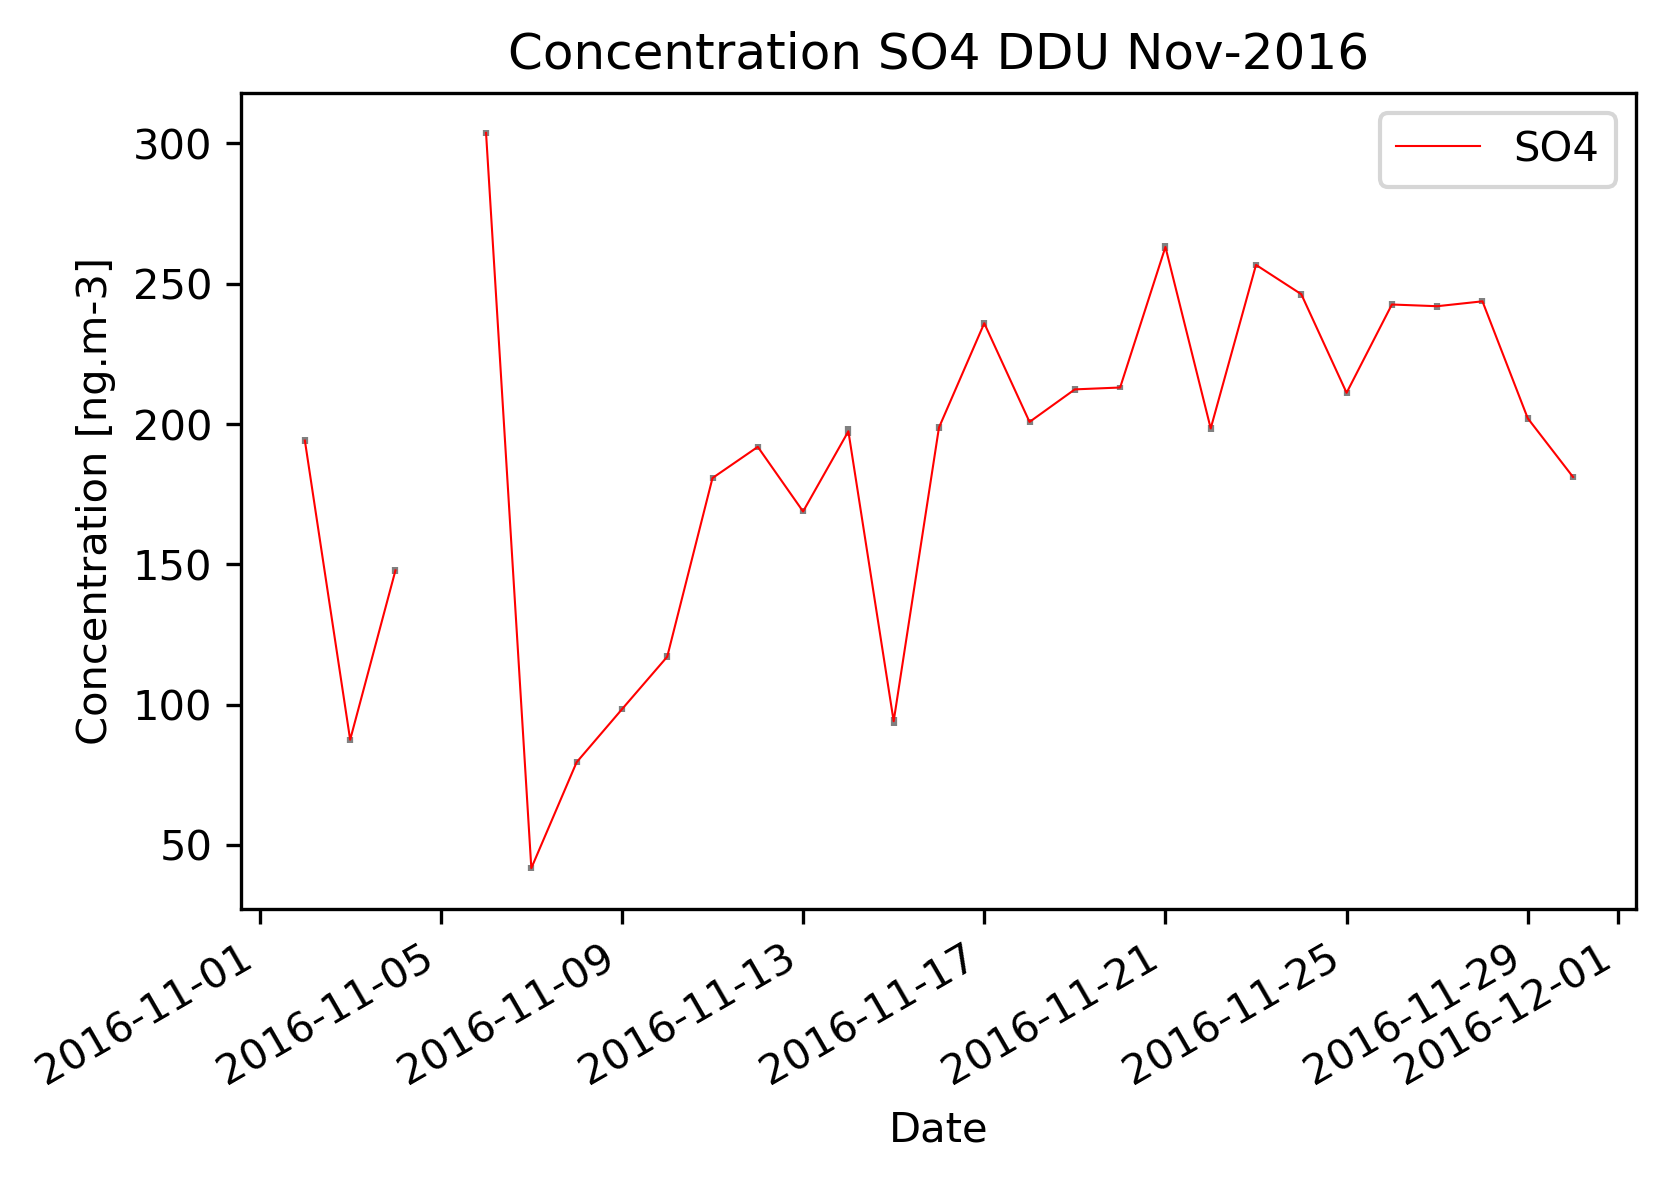

In [7]:
#On suppose ici que ΔVl/Vl est négligeable par rapport aux autres incertitudes. 
#Soit (ΔCair/Cair)2 ~ (ΔCl/Cl)2 + (ΔVair/Vair)2.
#Pour le volume d’air pompé :  ΔVair/Vair = 1E-4.


date_pleine = num2date(date) # Cela permet de convertir la date en un format visible pour l'homme 
#(autrement la date est calée par rapport au 0 Jan de l'an 00).

date_nov = date[181:210] # Sans rentrer dans les détails d'une recherche automatique, 
#on regarde en visualisant les tableaux dans python les index correspondant au mois de Novembre 2016. 
#Ici de 181 à 210.

blanc_moyen=7.74#blanc moyen à rétirer
blanc_octobre=3.75# si on choisi le mois de novembre seulement il est plus intéressant de retirer le blanc à la 
#la plus proche

so4_nov = so4[181:210]-blanc_octobre  # Ici on enlève le blanc correspondant au 
#filtre encore en place dans l'appareil de mesure. Cela correspond à celui du 16.10.2016 sur votre tableau.

V_echantillon = 10 #ml volume des échantillons prélevés
V_pompe_nov = V_pompe[181:210] #volumes d'air pompé pour le mois de novembre

# Calcul des concentrations dans l'air pour SO4 et NO3 suite à la formule calculée précédemment. 
#Grâce à la capacité de python (+numpy) de gérer les matrices/vecteurs, 
#pas besoin de faire une boucle, on peut faire des calculs appliqués à l'ensemble des vecteurs.
C_so4_nov = so4_nov * V_echantillon / V_pompe_nov

C_so4_nov[C_so4_nov>2000]=np.nan # on supprime une donnée abérrante que l'on remplace par un Nan(Not a number)

# On estime que l'erreur sur la concentration de SO4 dans le liquide de piégeage 
#est égale à l'écart type obtenu lors des blancs de mesure (cf. 2,2,1).
so4_nov_err = 4.68

# On calcule l'erreur sur le volume pompé pour le mois de Novembre
V_pompe_nov_err = 0.0001 * V_pompe_nov


C_so4_nov_err = np.sqrt(C_so4_nov**2 * (4.68/so4_nov)**2)
# On peut finalement tracer la concentration dans l'air correspondante pour voir graphiquement 
#l'incertitude sur les mesures.

fig = plt.figure(4, dpi=300)
plt.plot_date(date_nov,C_so4_nov,'-',color='red',label='SO4',linewidth=0.5)
plt.errorbar(date_nov, C_so4_nov, C_so4_nov_err, ecolor='grey',linestyle='None')
#ecolor : donne une couleur aux barres d'erreur/linestyle défini la coulour de la ligne, on choisi 'None' car nous
#avons déjà appliqué plt.plot
fig.autofmt_xdate()
plt.title('Concentration SO4 DDU Nov-2016')
plt.xlabel('Date')
plt.ylabel('Concentration [ng.m-3]')
plt.legend()
#plt.savefig('C_air_SO4_DDU_nov_2016.pdf')


A première vue, on dirait qu'une incertitude est représentée horizontalement, ce qui signifierait qu'on peut
potentiellement commettre une erreur sur la date, ce qui n'est pas réaliste. En réalité, cette « barre » n'est
autre que le chapeau de la barre d'erreur verticale, trop petite pour être visible. L'argument « capthick=0 »
dans la commande « plt.errorbar » permet de résoudre ce problème. Cela nous indique aussi que
l'incertitude sur les concentration de SO4 dans l'air est très faible, et que ce signal ainsi que cette
augmentation brutale entre le 04 et 07 Novembre est bien réelle (cf. intro 2.2.5)
